<a href="https://colab.research.google.com/github/lizardnote/ML_practice/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_ch2_skikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/dat.csv')
df.head()

,school,sex,paid,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,GP,F,no,4,3,4.0,1,1,3,6,1
1,GP,F,no,5,3,3.0,1,1,3,4,1
2,GP,F,yes,4,3,2.0,2,3,3,10,4
3,GP,F,yes,3,2,2.0,1,1,5,2,9
4,GP,F,yes,4,3,2.0,1,2,5,4,4


In [3]:
X = df.drop(['grade'], axis = 1)
y = df.grade

In [4]:
X.head()

,school,sex,paid,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,no,4,3,4.0,1,1,3,6
1,GP,F,no,5,3,3.0,1,1,3,4
2,GP,F,yes,4,3,2.0,2,3,3,10
3,GP,F,yes,3,2,2.0,1,1,5,2
4,GP,F,yes,4,3,2.0,1,2,5,4


# train test set split

In [11]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    X,y, test_size = 0.2, random_state = 42, shuffle = True, stratify = None
)

#suffle = 데이터를 섞을지 여부
#stratify = 층화 샘플링 여부

Text(0.5, 1.0, 'histogram of test y')

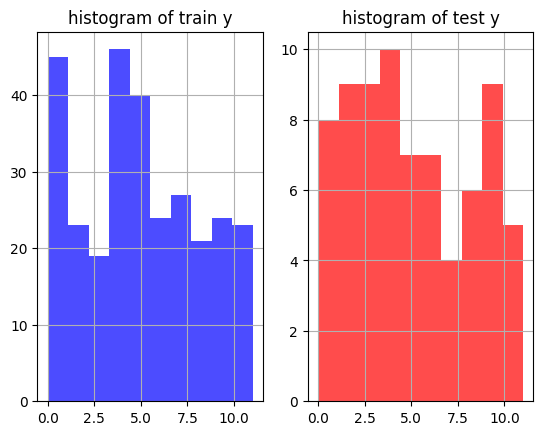

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 1, ncols = 2)
train_y.hist(ax = axs[0], color = 'blue', alpha = 0.7)
axs[0].set_title('histogram of train y')

test_y.hist(ax = axs[1], color = 'red', alpha = 0.7)
axs[1].set_title('histogram of test y')

In [7]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(292, 10)
(74, 10)
(292,)
(74,)


In [8]:
train_X, test_X, train_y, test_y = train_test_split(
    X,y, test_size = 0.2, random_state = 42, stratify = X['school']
)

Text(0.5, 1.0, 'histogram of test y')

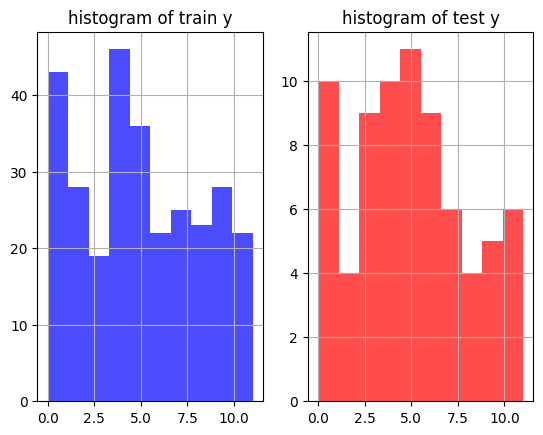

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 1, ncols = 2)
train_y.hist(ax = axs[0], color = 'blue', alpha = 0.7)
axs[0].set_title('histogram of train y')

test_y.hist(ax = axs[1], color = 'red', alpha = 0.7)
axs[1].set_title('histogram of test y')

분포가 일정하게 유지된 것을 볼 수 있다.

# 결측치 처리
## 1) 수치형 변수

In [17]:
df.isna().sum(axis = 0)

,0
school,0
sex,0
paid,0
famrel,0
freetime,0
goout,10
Dalc,0
Walc,0
health,0
absences,0


In [19]:
# 평균 대치
from sklearn.impute import SimpleImputer

train_X1 = train_X.copy()
test_X1 = test_X.copy()
imputer_mean = SimpleImputer(strategy = 'mean') #평균대치법

# 결측치 평균으로 대치 후 저장
train_X1['goout'] = imputer_mean.fit_transform(train_X1[['goout']])
test_X1['goout'] = imputer_mean.transform(test_X1[['goout']])

print(train_X1['goout'].isna().sum())
print(test_X1['goout'].isna().sum())

0
0


train data 와 test data에 적용한 함수가 다른 이유
- fit_transform 은 계산(학습) 후 저장하는 기능을 하고
- transform 은 학습된 데이터를 활용해 데이터에 저장(변환)만 한다.

test data가 fit 되는 경우를 방지하기 위해 train data에서 학습한 데이터로 결측치를 채워준다.

[['goout']]처럼 대괄호 2개를 쓰는 이유는 SimpleImputer가 **2차원 형태(DataFrame)**를 요구하기 때문임


In [20]:
imputer_mean

SimpleImputer()

In [23]:
from sklearn.impute import SimpleImputer

train_X2 = train_X.copy()
test_X2 = test_X.copy()

imputer_median = SimpleImputer(strategy = 'median')
train_X2['goout'] = imputer_median.fit_transform(train_X2[['goout']])
test_X2['goout'] = imputer_median.transform(test_X2[['goout']])

print(train_X2['goout'].isna().sum())
print(test_X2['goout'].isna().sum())

0
0


In [25]:
from sklearn.impute import SimpleImputer

train_X3 = train_X.copy()
test_X3 = test_X.copy()

imputer_mode = SimpleImputer(strategy = 'most_frequent')
train_X3['goout'] = imputer_mode.fit_transform(train_X3[['goout']])
test_X3['goout'] = imputer_mode.transform(test_X3[['goout']])

print(train_X3['goout'].isna().sum())
print(test_X3['goout'].isna().sum())

0
0


KNNImputer는 주변 이웃을 활용한 결측치 채우기 방식

- 수치형만 가능, 범주형은 인코딩 필요
- 거리 계산에 민감하므로 스케일링 선행이 중요
- 테스트 데이터에는 .transform()만 써야 함

In [29]:
# KNN 활용한 결측치 대치법

from sklearn.impute import KNNImputer

train_X5 = train_X.copy()
test_X5 = test_X.copy()

train_X5_num = train_X5.select_dtypes('number')
test_X5_num = test_X5.select_dtypes('number')

train_X5_cat = train_X5.select_dtypes('object')
test_X5_cat = test_X5.select_dtypes( 'object')

knnimputer = KNNImputer(n_neighbors = 5)

train_X5_num_imputed = knnimputer.fit_transform(train_X5_num)
test_X5_num_imputed = knnimputer.transform(test_X5_num)

In [32]:
#KNNimputer는 np.array로 출력되기 때문에 df로 변환해준다.
train_X5_num_imputed2 = pd.DataFrame(train_X5_num_imputed, columns = train_X5_num.columns, index = train_X5.index)
test_X5_num_imputed2 = pd.DataFrame(test_X5_num_imputed, columns = test_X5_num.columns, index = test_X5.index)

In [33]:
train_X5_num_imputed2

,famrel,freetime,goout,Dalc,Walc,health,absences
341,3.0,3.0,4.0,2.0,4.0,3.0,4.0
202,4.0,2.0,5.0,1.0,2.0,5.0,2.0
75,4.0,4.0,4.0,1.0,1.0,5.0,10.0
84,3.0,3.0,3.0,2.0,3.0,2.0,4.0
354,3.0,2.0,4.0,1.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...
71,5.0,2.0,3.0,1.0,3.0,3.0,0.0
106,5.0,2.0,4.0,1.0,4.0,5.0,20.0
270,3.0,1.0,2.0,1.0,1.0,3.0,6.0
348,3.0,4.0,3.0,1.0,1.0,3.0,8.0


In [36]:
knnimputer2 = KNNImputer(n_neighbors = 5).set_output(transform = 'pandas')
train_X5_num_imputed2 = knnimputer2.fit_transform(train_X5_num)
test_X5_num_imputed2 = knnimputer2.fit_transform(test_X5_num)

train_X5_num_imputed2.head()

,famrel,freetime,goout,Dalc,Walc,health,absences
341,3.0,3.0,4.0,2.0,4.0,3.0,4.0
202,4.0,2.0,5.0,1.0,2.0,5.0,2.0
75,4.0,4.0,4.0,1.0,1.0,5.0,10.0
84,3.0,3.0,3.0,2.0,3.0,2.0,4.0
354,3.0,2.0,4.0,1.0,4.0,2.0,4.0


In [38]:
print(train_X5_num_imputed2['goout'].isna().sum())
print(test_X5_num_imputed2['goout'].isna().sum())

0
0


# pandas 결측치 처리
- fillna()

In [40]:
data = {
    '학생' : ['철수','영희','민수','수지','지현'],
    '수학' : [85, np.nan, 78, np.nan, 93],
    '영어' : [np.nan, 88, 78, 85, np.nan],
    '과학' : [92, 85, np.nan, 80, 88]
}

df = pd.DataFrame(data)

In [43]:
df1 = df.copy()
df1['수학'].fillna(df1['수학'].mean(), inplace = True)
df1['영어'].fillna(df1['영어'].mean(), inplace = True)
df1['과학'].fillna(df1['과학'].mean(), inplace = True)

df1

<ipython-input-43-b0885db1c479>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['수학'].fillna(df1['수학'].mean(), inplace = True)
<ipython-input-43-b0885db1c479>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,학생,수학,영어,과학
0,철수,85.000000,83.666667,92.00
1,영희,85.333333,88.000000,85.00
2,민수,78.000000,78.000000,86.25
3,수지,85.333333,85.000000,80.00
4,지현,93.000000,83.666667,88.00


In [46]:
#Forward Fill : 이전행의 값으로 대치
df2 = df.copy()
df2['영어'].fillna(method = 'ffill', inplace = True)

#Backward fill : 다음행의 값으로 대치
df2['과학'].fillna(method = 'bfill', inplace = True)

#다른 컬럼의 값으로 결측치 대치
df3 = df.copy()
df3['수학'].fillna(df3['영어'], inplace = True)

df3

<ipython-input-46-2124cc28cc1d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['영어'].fillna(method = 'ffill', inplace = True)
<ipython-input-46-2124cc28cc1d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['영어'].fillna(method = 'ffill', inplace = True)
<ipython-input-46-2124cc28cc1d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior w

,학생,수학,영어,과학
0,철수,85.0,NaN,92.0
1,영희,88.0,88.0,85.0
2,민수,78.0,78.0,NaN
3,수지,85.0,85.0,80.0
4,지현,93.0,NaN,88.0


In [47]:
# 각 컬럼의 평균값으로 결측치 대치
df4 = df.copy()
df4_num = df4.select_dtypes('number')
df4_num = df4_num.apply(lambda col : col.fillna(col.mean()))
df4[df4_num.columns] = df4_num

df4

,학생,수학,영어,과학
0,철수,85.000000,83.666667,92.00
1,영희,85.333333,88.000000,85.00
2,민수,78.000000,78.000000,86.25
3,수지,85.333333,85.000000,80.00
4,지현,93.000000,83.666667,88.00


## 2) 범주형 변수

In [49]:
#lable encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

train_X6 = train_X.copy()
test_X6 = test_X.copy()

#범주형 변수만 선택
train_X6_cat = train_X6.select_dtypes('object')
test_X6_cat = test_X6.select_dtypes('object')

ordinalencoder = OrdinalEncoder().set_output(transform = 'pandas')
train_X6_cat = ordinalencoder.fit_transform(train_X6_cat)
test_X6_cat = ordinalencoder.transform(test_X6_cat)

train_X6_cat.head()

,school,sex,paid
341,1.0,1.0,1.0
202,0.0,0.0,0.0
75,0.0,0.0,1.0
84,0.0,0.0,0.0
354,1.0,1.0,1.0


만약 train data은 있지만 test data 없는 학습되지 않는 카테고리를 처리하고자 한다면
- OrdinalEncoder(handle_unknown = 'use_encoded_value', unknow_value = -1)

In [54]:
# one-hot encoding

from sklearn.preprocessing import OneHotEncoder

train_X7 = train_X.copy()
test_X7 = test_X.copy()

#범주형만 선택
train_X7_cat = train_X7.select_dtypes('object')
test_X7_cat = test_X7.select_dtypes('object')

# ignore 옵션은 학습되지 않은 카테고리 처리 시 모두 0인 컬럼으로 생성
onehotencoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore').set_output(transform = 'pandas')
train_X7_cat = onehotencoder.fit_transform(train_X7_cat)
test_X7_cat = onehotencoder.transform(test_X7_cat)

train_X7_cat.head()

,school_GP,school_MS,sex_F,sex_M,paid_no,paid_yes
341,0.0,1.0,0.0,1.0,0.0,1.0
202,1.0,0.0,1.0,0.0,1.0,0.0
75,1.0,0.0,1.0,0.0,0.0,1.0
84,1.0,0.0,1.0,0.0,1.0,0.0
354,0.0,1.0,0.0,1.0,0.0,1.0


In [56]:
#dummy encoding

train_X8 = train_X.copy()
test_X8 = test_X.copy()

#범주형만 선택
train_X8_cat = train_X8.select_dtypes('object')
test_X8_cat = test_X8.select_dtypes('object')

#dummy encoder
dummyencoder = OneHotEncoder(sparse_output=False, drop = 'first', handle_unknown = 'ignore').set_output(transform = 'pandas')
train_X8_cat = dummyencoder.fit_transform(train_X8_cat)
test_X8_cat = dummyencoder.transform(test_X8_cat)

train_X8_cat.head()


,school_MS,sex_M,paid_yes
341,1.0,1.0,1.0
202,0.0,0.0,0.0
75,0.0,0.0,1.0
84,0.0,0.0,0.0
354,1.0,1.0,1.0


각 변수의 범주 개수 -1개씩 줄어든 것을 확인할 수 있다.

## 2-2) 범주형 변수 범주 축소 방법 : Class coercing

In [57]:
train_bike = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/bike_train.csv')
test_bike = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/bike_test.csv')

train_bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,97,160,257
1,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,90,775,865
2,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,2,94,96


In [58]:
train_bike['weather'].value_counts()

,count
weather,
1,5772
2,2273
3,662
4,1


In [60]:
prob_columns = train_bike['weather'].map(train_bike['weather'].value_counts(normalize = True))

In [61]:
prob_columns.head(2)

,weather
0,0.662839
1,0.662839


In [63]:
train_bike['weather'] = train_bike['weather'].mask(prob_columns < 0.1, 'other')
test_bike['weather'] = np.where(test_bike['weather'].isin([4]), 'other', test_bike['weather'])

train_bike['weather'].value_counts()

,count
weather,
1,5772
2,2273
other,663


## 3) 변수 변환 및 스케일링